2025/09/22 07:52:25 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/22 07:52:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


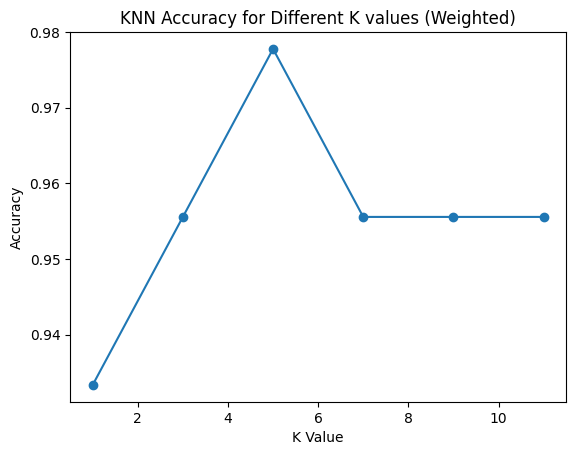

Best K = 5, Accuracy = 0.9778
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [2]:


import mlflow
import mlflow.sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

k_values = [1, 3, 5, 7, 9, 11]
accuracies = []

mlflow.set_experiment("Iris_KNN_Classification")

with mlflow.start_run():
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
        mlflow.log_param(f"k_value_{k}", k)
        mlflow.log_metric(f"accuracy_k_{k}", acc)

    best_k = k_values[np.argmax(accuracies)]
    best_acc = max(accuracies)

    final_knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
    final_knn.fit(X_train, y_train)
    mlflow.sklearn.log_model(final_knn, "knn_model")
    mlflow.log_param("best_k", best_k)
    mlflow.log_metric("best_accuracy", best_acc)

plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for Different K values (Weighted)")
plt.show()

y_best_pred = final_knn.predict(X_test)
print(f"Best K = {best_k}, Accuracy = {best_acc:.4f}")
print(classification_report(y_test, y_best_pred, target_names=iris.target_names))
